In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as nd
from numpy import random
import pandas as pd
from pandas import Series
from IPython.display import Image, HTML, display
import os

In [2]:
# Read the csv file into a pandas DataFrame
wine_data = pd.read_csv('./Data/wine.csv')
wine_data.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
# Assign the data to X and y
X = wine_data.drop("color", axis=1)

y = wine_data["high_quality"].values.reshape(-1, 1)

print(X.shape, y.shape)

(6497, 14) (6497, 1)


In [4]:
# Add graphviz executables
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

## Random Tree Classifier

In [5]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print(X_train, y_train)

      Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  \
1539        1539            7.2             0.390         0.32   
1109        1109           10.8             0.470         0.43   
100          100            8.3             0.610         0.30   
5477        3878            6.5             0.350         0.31   
6416        4817            5.8             0.385         0.25   
...          ...            ...               ...          ...   
3772        2173            7.6             0.320         0.58   
5191        3592            5.6             0.280         0.27   
5226        3627            6.4             0.370         0.20   
5390        3791            6.5             0.260         0.50   
860          860            7.2             0.620         0.06   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
1539            1.80      0.065                 34.0                  60.0   
1109            2.10      0.171                 27.

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)
feature_names = X.columns

In [9]:
# Calculate feature importance
importances = rf.feature_importances_
importances

array([0.00185731, 0.00107355, 0.01348824, 0.00568513, 0.00147401,
       0.00622367, 0.00313934, 0.00237875, 0.01158418, 0.00114806,
       0.00247881, 0.03779082, 0.41898218, 0.49269595])

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.49269594645520104, 'high_quality'),
 (0.4189821803010318, 'quality'),
 (0.037790822592582866, 'alcohol'),
 (0.013488244334444571, 'volatile_acidity'),
 (0.011584183084498698, 'density'),
 (0.00622367281111529, 'chlorides'),
 (0.005685125437627032, 'citric_acid'),
 (0.00313934352691445, 'free_sulfur_dioxide'),
 (0.0024788092251454502, 'sulphates'),
 (0.002378751230753618, 'total_sulfur_dioxide'),
 (0.0018573071942418163, 'Unnamed: 0'),
 (0.0014740073786256155, 'residual_sugar'),
 (0.0011480583104638334, 'pH'),
 (0.0010735481173540136, 'fixed_acidity')]

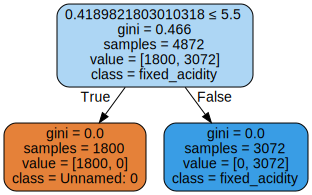

In [13]:
# Create a decision tree graph
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=importances,  
    class_names=feature_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('./Images/wine_quality.png')

graph = graphviz.Source(dot_data)  
graph

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## KNN

In [15]:
from sklearn.preprocessing import StandardScaler

# Create StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [16]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.999/0.998
k: 5, Train/Test Score: 0.999/0.999
k: 7, Train/Test Score: 0.999/0.999
k: 9, Train/Test Score: 0.999/0.999
k: 11, Train/Test Score: 0.999/0.999
k: 13, Train/Test Score: 0.998/0.999
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.998
k: 19, Train/Test Score: 0.999/0.999


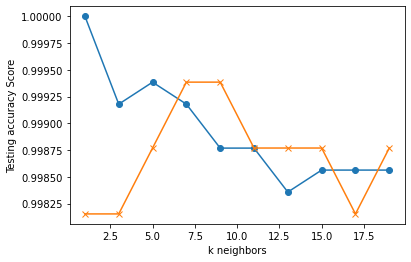

<Figure size 432x288 with 0 Axes>

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train.ravel())
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
# plt.savefig('./Images/train_test_score.png')

In [18]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train.ravel())
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.999


## SVM

In [19]:
from matplotlib import style
style.use("ggplot")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
import warnings
warnings.filterwarnings('ignore')

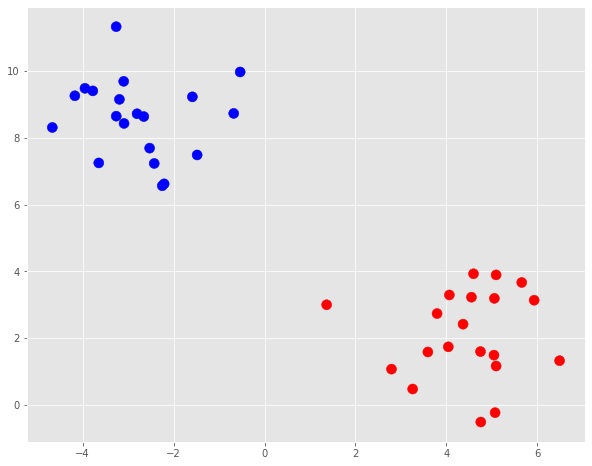

<Figure size 720x576 with 0 Axes>

In [20]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()
# plt.savefig('./Images/svm_scatter.png')

In [21]:
# Create SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X, y)

SVC(kernel='poly')

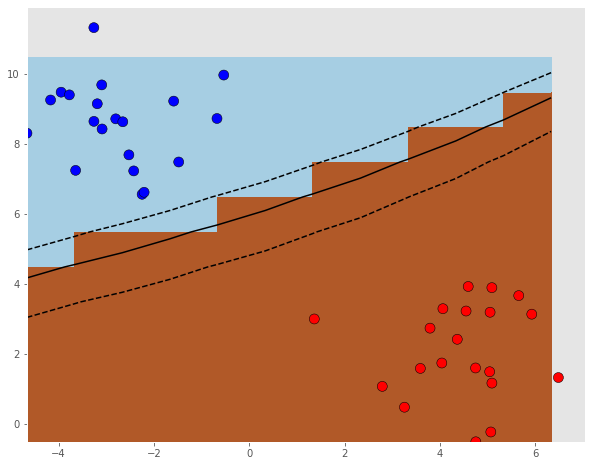

In [22]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
# plt.savefig('./Images/decision_plot.png')
plt.show()

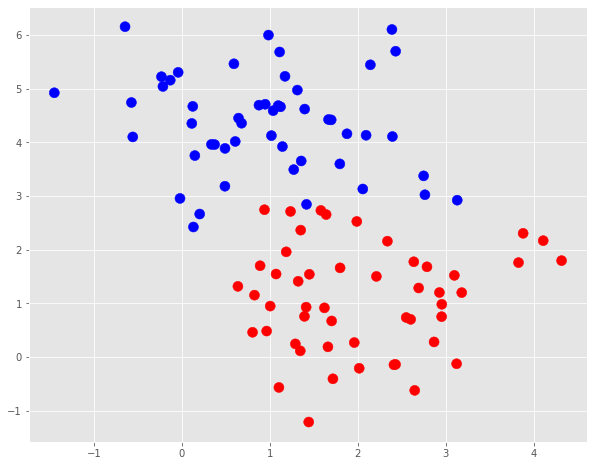

<Figure size 720x576 with 0 Axes>

In [23]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()
# plt.savefig('./Images/gaussian_distribution_blob.png')

In [24]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Fit to the training data and validate with the test data
model = SVC(kernel='poly')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

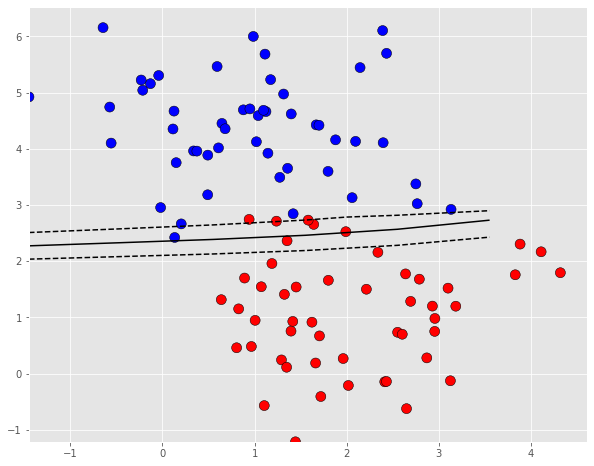

In [26]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [27]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



In [28]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.920


In [29]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



## GridSearch Estimator

In [30]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [31]:
# Fit the model using GSE 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=50, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.533, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] ................... C=50, gamma=0.001, score=0.533, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] ................... C=50, gamma=0.001, score=0.533, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [32]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [33]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [34]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       1.00      0.80      0.89        10
         red       0.88      1.00      0.94        15

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25

